<a href="https://colab.research.google.com/github/adw1029/CSCI_544/blob/main/Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

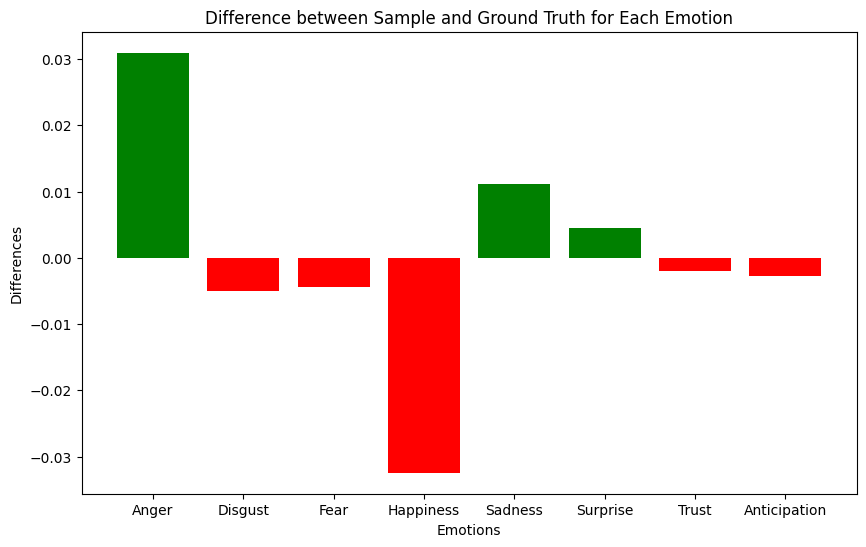

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the emotions
emotions = ["Anger", "Disgust", "Fear", "Happiness", "Sadness", "Surprise", "Trust", "Anticipation"]

# Hypothetical ground truth and sample lists (intensity values for each emotion)
ground_truth = [0.15140957, 0.05619636, 0.04939349, 0.34024668, 0.24305308, 0.0592651 , 0.05107951, 0.04935617]
sample = [0.182358, 0.051233, 0.044948, 0.307803, 0.254146, 0.06381, 0.049057, 0.046645]


# Calculate the differences
differences = np.array(sample) - np.array(ground_truth)

# Determine bar colors: 'green' for positive, 'red' for negative
colors = ['green' if diff > 0 else 'red' for diff in differences]

# Plotting the differences
plt.figure(figsize=(10, 6))
plt.bar(emotions, differences, color=colors)
plt.xlabel('Emotions')
plt.ylabel('Differences')
plt.title('Difference between Sample and Ground Truth for Each Emotion')
plt.show()


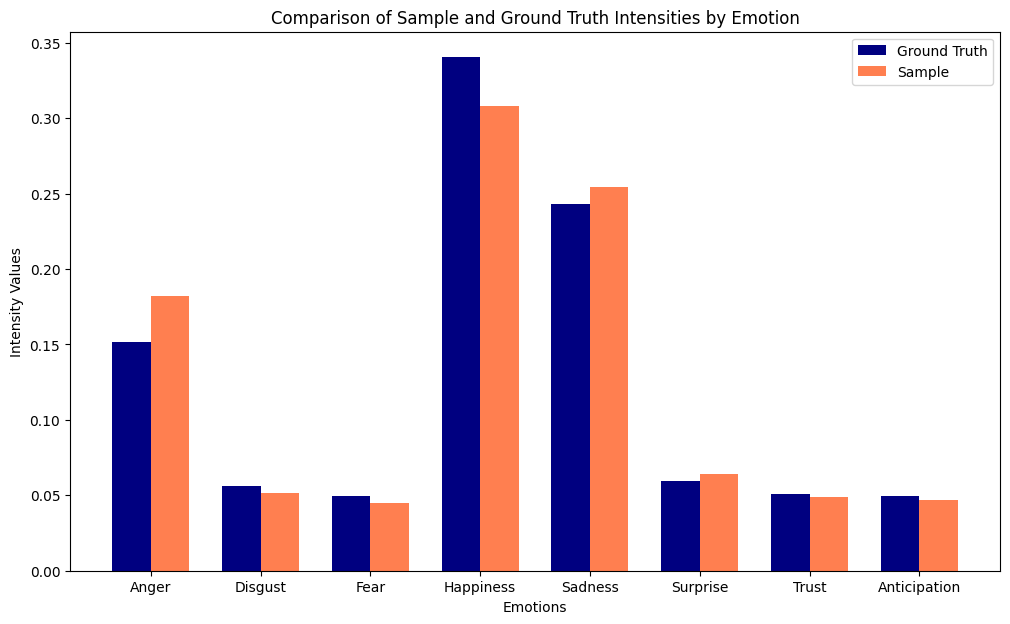

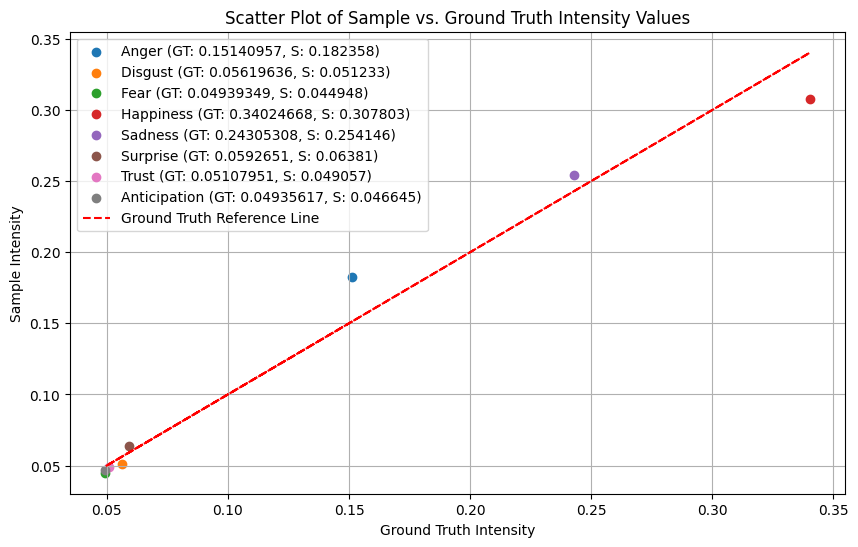

(0.00027624312435530016, 0.011646557500000002, 0.987469654070097)

In [2]:
# Create overlaid bar charts for visual comparison
fig, ax = plt.subplots(figsize=(12, 7))
width = 0.35  # the width of the bars
indices = np.arange(len(emotions))  # the x locations for the groups

rects1 = ax.bar(indices - width/2, ground_truth, width, label='Ground Truth', color='navy')
rects2 = ax.bar(indices + width/2, sample, width, label='Sample', color='coral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Emotions')
ax.set_ylabel('Intensity Values')
ax.set_title('Comparison of Sample and Ground Truth Intensities by Emotion')
ax.set_xticks(indices)
ax.set_xticklabels(emotions)
ax.legend()

# Create a scatter plot for the same data
# Create a scatter plot with sample values as dots and ground truth as a line
plt.figure(figsize=(10, 6))
for i, text in enumerate(emotions):
    plt.scatter(ground_truth[i], sample[i], label=f"{text} (GT: {ground_truth[i]}, S: {sample[i]})")
plt.plot(ground_truth, ground_truth, 'r--', label='Ground Truth Reference Line')  # Adding a reference line
plt.xlabel('Ground Truth Intensity')
plt.ylabel('Sample Intensity')
plt.title('Scatter Plot of Sample vs. Ground Truth Intensity Values')
plt.legend()
plt.grid(True)

plt.show()

# Calculate statistical measures
mse = np.mean((np.array(ground_truth) - np.array(sample))**2)
mae = np.mean(np.abs(np.array(ground_truth) - np.array(sample)))
correlation_coefficient = np.corrcoef(ground_truth, sample)[0, 1]

mse, mae, correlation_coefficient


Accuracy Measure: A combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE) to measure accuracy. Lower values will correspond to higher scores.

Similarity Measure: Use the correlation coefficient to evaluate the alignment of patterns between the sample and ground truth. A higher correlation can translate into a higher score.

Penalty for Major Deviations: Implement additional penalties for large discrepancies in critical emotions, such as happiness or anger, which may be particularly relevant in customer interactions.

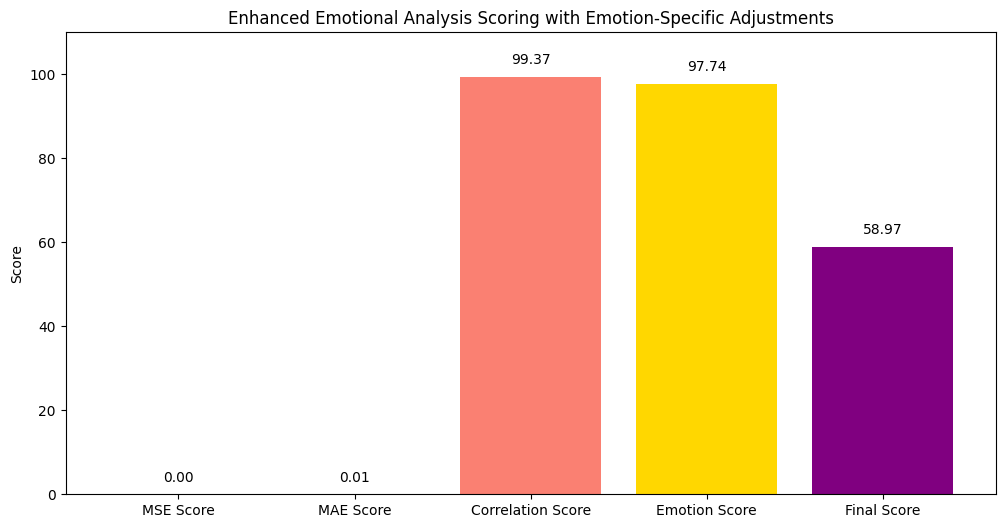

In [6]:
def calculate_emotion_specific_scores(ground_truth, sample, emotions):
    differences = np.array(sample) - np.array(ground_truth)
    emotion_scores = []

    # Define positive and negative emotions
    positive_emotions = ["Happiness", "Trust", "Anticipation"]
    negative_emotions = ["Anger", "Disgust", "Fear", "Sadness"]

    # Scoring adjustments
    for i, diff in enumerate(differences):
        if emotions[i] in positive_emotions:
            if diff > 0:
                # Positive deviation in positive emotions increases score more
                score = 100 + diff * 100  # Scale up the difference
            else:
                # Negative deviation in positive emotions deducts more from the score
                score = 100 + diff * 200  # Scale up the penalty
        elif emotions[i] in negative_emotions:
            if diff > 0:
                # Positive deviation in negative emotions deducts more from the score
                score = 100 - diff * 200  # Scale up the penalty
            else:
                # Negative deviation in negative emotions increases score more
                score = 100 + abs(diff) * 100  # Scale up the benefit

        emotion_scores.append(max(0, min(score, 100)))  # Ensure score is between 0 and 100

    return np.mean(emotion_scores)  # Return the average of the adjusted scores

# Update the main scoring function to include this new mechanism
def calculate_scores(ground_truth, sample, emotions):
    emotion_score = calculate_emotion_specific_scores(ground_truth, sample, emotions)

    # Existing metrics calculation
    mse = np.mean((np.array(ground_truth) - np.array(sample))**2)
    mae = np.mean(np.abs(np.array(ground_truth) - np.array(sample)))
    correlation = np.corrcoef(ground_truth, sample)[0, 1]
    correlation_score = (correlation + 1) / 2 * 100  # Normalize to 0-100

    # New overall score calculation
    weights = [0.2, 0.2, 0.2, 0.4]  # Adjust weights to put more emphasis on the emotion-specific score
    final_score = (mse * weights[0] + mae * weights[1] + correlation_score * weights[2] + emotion_score * weights[3]) / sum(weights)

    return final_score, mse, mae, correlation_score, emotion_score

# Example usage
final_score, mse_score, mae_score, correlation_score, emotion_score = calculate_scores(ground_truth, sample, emotions)

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 6))
metrics = ['MSE Score', 'MAE Score', 'Correlation Score', 'Emotion Score', 'Final Score']
scores = [mse_score, mae_score, correlation_score, emotion_score, final_score]
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'purple']
ax.bar(metrics, scores, color=colors)
ax.set_ylim(0, 110)
ax.set_ylabel('Score')
ax.set_title('Enhanced Emotional Analysis Scoring with Emotion-Specific Adjustments')
for i in range(len(scores)):
    ax.text(i, scores[i] + 3, f'{scores[i]:.2f}', ha='center', color='black')

plt.show()


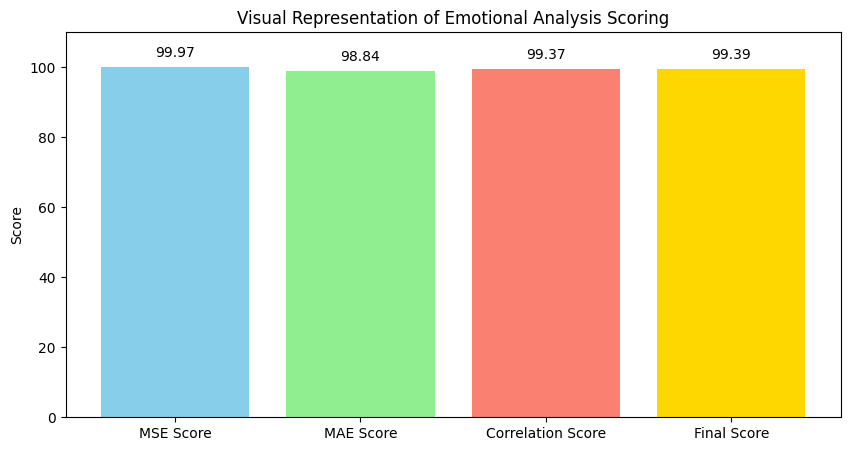

In [4]:
import matplotlib.pyplot as plt

def calculate_scores(ground_truth, sample):
    mse = np.mean((np.array(ground_truth) - np.array(sample))**2)
    mae = np.mean(np.abs(np.array(ground_truth) - np.array(sample)))
    correlation = np.corrcoef(ground_truth, sample)[0, 1]

    # Convert MSE and MAE to a score (0 to 100), higher is better
    max_error = 1  # assuming the maximum expected error
    mse_score = max(0, (1 - mse / max_error) * 100)
    mae_score = max(0, (1 - mae / max_error) * 100)

    # Convert correlation to a score (0 to 100)
    correlation_score = (correlation + 1) / 2 * 100

    # Weighted average of scores
    weights = [0.3, 0.3, 0.4]  # Adjust weights as necessary
    final_score = (mse_score * weights[0] + mae_score * weights[1] + correlation_score * weights[2]) / sum(weights)

    return final_score, mse_score, mae_score, correlation_score

# Example usage and plotting
final_score, mse_score, mae_score, correlation_score = calculate_scores(ground_truth, sample)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
metrics = ['MSE Score', 'MAE Score', 'Correlation Score', 'Final Score']
scores = [mse_score, mae_score, correlation_score, final_score]
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']
ax.bar(metrics, scores, color=colors)
ax.set_ylim(0, 110)
ax.set_ylabel('Score')
ax.set_title('Visual Representation of Emotional Analysis Scoring')

# Adding text labels for each bar
for i in range(len(scores)):
    ax.text(i, scores[i] + 3, f'{scores[i]:.2f}', ha = 'center', color = 'black')

plt.show()


In [5]:
def provide_emotion_guidance(ground_truth, sample, emotions):
    differences = np.array(sample) - np.array(ground_truth)
    advice = []

    # Threshold for significant deviation might be set as a percentage of the maximum score (e.g., 10% of scale)
    significant_threshold = 0.1  # Adjust as needed

    for i, diff in enumerate(differences):
        if abs(diff) > significant_threshold:
            if diff > 0:
                advice.append(f"Reduce {emotions[i]} by {abs(diff):.2f} units to align better with expected levels.")
            else:
                advice.append(f"Increase {emotions[i]} by {abs(diff):.2f} units to align better with expected levels.")

    if not advice:
        advice.append("Your emotional responses are well-aligned with expectations. Keep maintaining this balance.")

    return advice

# Example usage
guidance = provide_emotion_guidance(ground_truth, sample, emotions)
for line in guidance:
    print(line)


Your emotional responses are well-aligned with expectations. Keep maintaining this balance.
